In [296]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [297]:
# Завантаження навчальних та тестових даних
train = pd.read_csv("application_train.csv")
test = pd.read_csv("application_test.csv")
train.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
43658,150540,0,Cash loans,M,Y,Y,1,180000.0,454500.0,19386.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
41918,148533,0,Cash loans,F,N,Y,0,157500.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
207180,340140,0,Cash loans,F,N,Y,0,270000.0,545040.0,26640.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
143603,266516,0,Cash loans,F,N,Y,4,90000.0,1005120.0,29520.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
130736,251637,0,Cash loans,M,N,N,0,157500.0,513531.0,38524.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
150673,274663,0,Cash loans,M,Y,N,1,211500.0,526500.0,41728.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
163508,289544,0,Cash loans,F,Y,N,2,315000.0,1886850.0,51885.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
282717,427454,0,Cash loans,M,Y,N,1,360000.0,500211.0,48861.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
224997,360610,0,Cash loans,F,N,N,2,135000.0,848745.0,43335.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
142233,264919,0,Cash loans,F,N,Y,1,67500.0,135000.0,14305.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [298]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


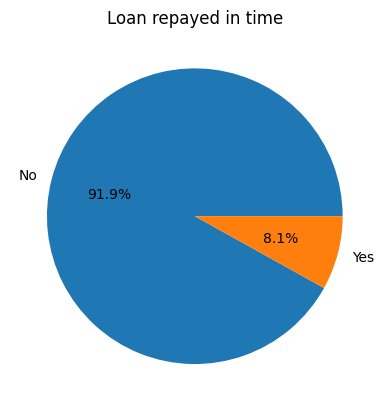

In [299]:
# Графік кругової діаграми для відсотка позитивних та негативних значень цільової змінної
plt.pie(train['TARGET'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Loan repayed in time')
plt.show()

In [300]:
print(", ".join(train.columns))

SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGA

In [301]:
train.drop(columns=['SK_ID_CURR'], inplace=True)

In [302]:
# Підрахунок кількості пропущених значень в навчальних даних
print(train.isnull().sum())

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 121, dtype: int64


In [303]:
train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Length: 307511, dtype: bool

In [304]:
train.duplicated().sum()

0

array([[<Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>],
       [<Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'ce

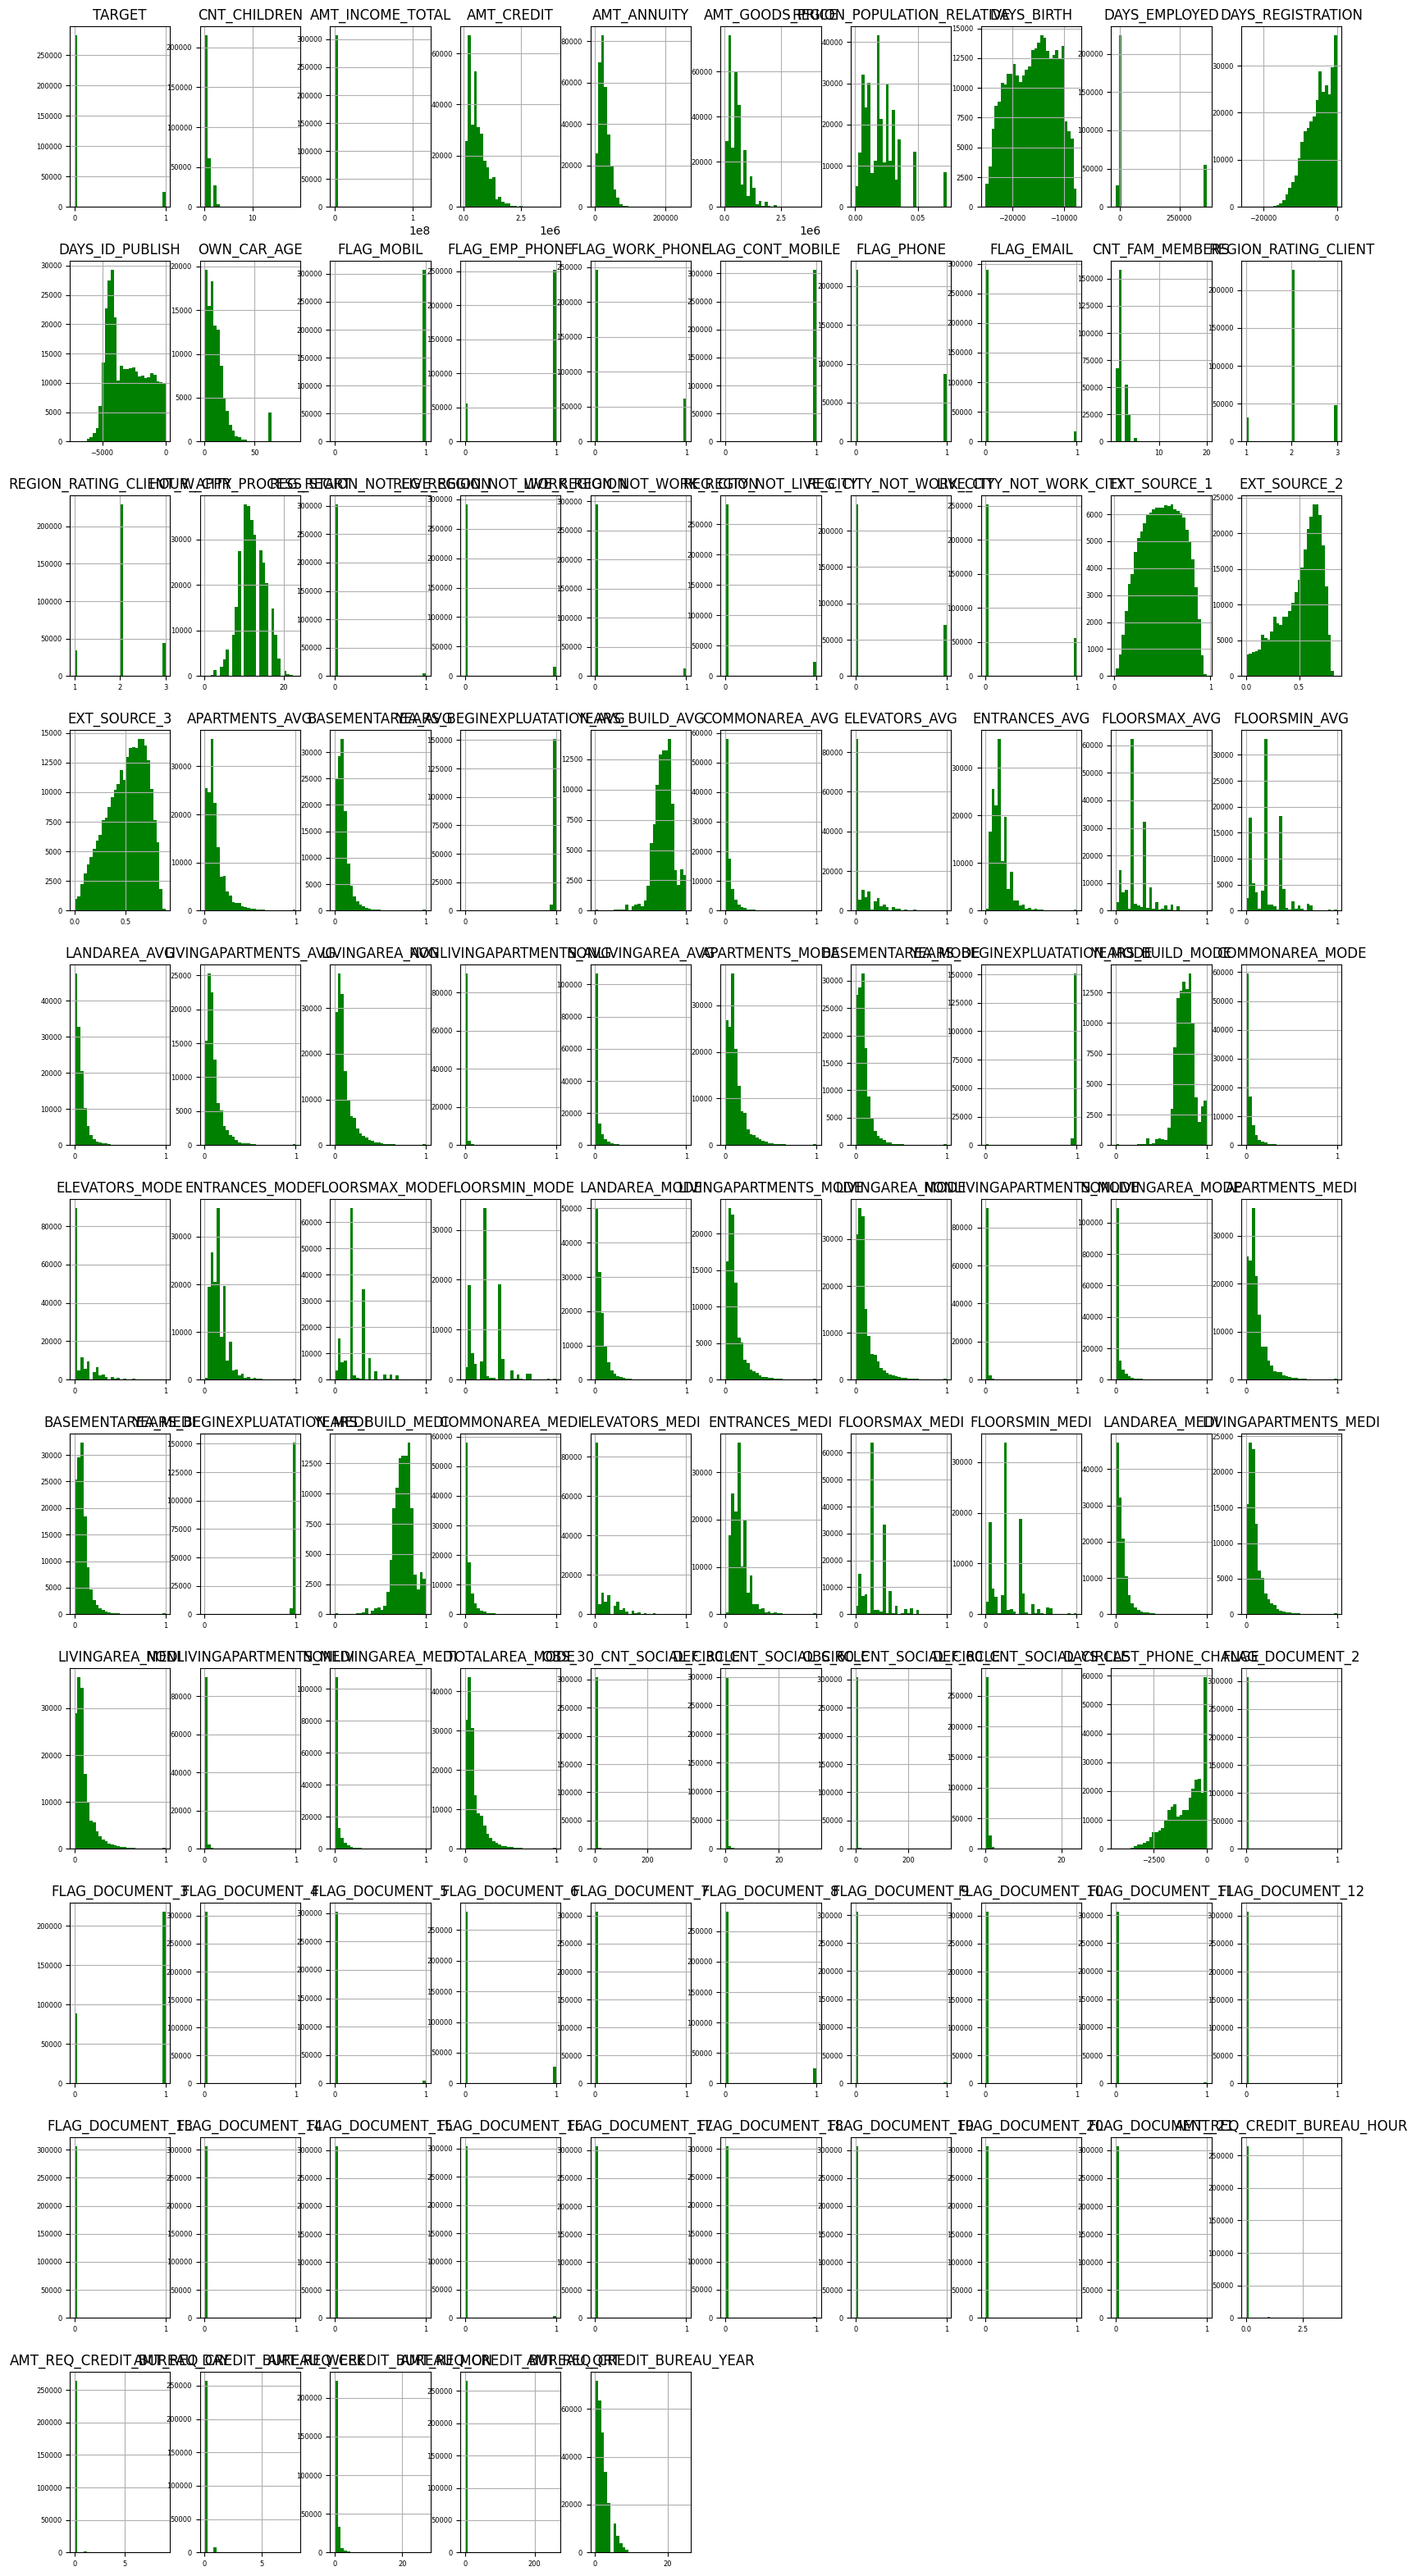

In [305]:
# Гістограми числових ознак навчальних даних
num_features = train.select_dtypes(include = ['float64', 'int64']).columns
train[num_features].hist(figsize=(20, 40), color = 'g', bins=30, xlabelsize=6, ylabelsize=6)

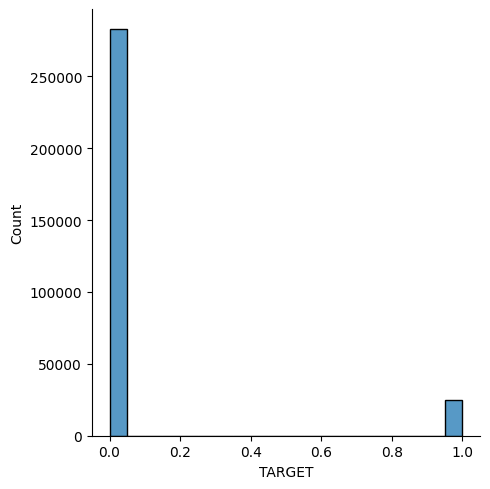

In [306]:
# Графік розподілу цільової змінної
sns.displot(train['TARGET'], kde=False)

In [307]:
# Функція для підрахунку кількості пропущених значень за кожним стовпцем
def getNullsCount(input_data):
    null_cols = input_data.columns[input_data.isnull().any()]

    null_counts = {}
    for col in null_cols:
        null_counts[col] = input_data[col].isnull().sum()

    null_counts = dict(sorted(null_counts.items(), key=lambda item: item[1]))

    return null_counts
# Функція для виведення кількості пропущених значень за кожним стовпцем
def printNullsCounts(null_counts, data_length):
    print("{:<35} {:<20} {:<10}".format('Column', 'Null Count', 'Null %'))
    print('-' * 70)
    for col, count in null_counts.items():
        null_percent = round(count / data_length * 100, 2)
        print("{:<35} {:<20} {:<10}%".format(col, count, null_percent))

In [308]:
# Підрахунок та виведення кількості пропущених значень в навчальних даних
null_counts = getNullsCount(train)
printNullsCounts(null_counts, len(train))

Column                              Null Count           Null %    
----------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE              1                    0.0       %
CNT_FAM_MEMBERS                     2                    0.0       %
AMT_ANNUITY                         12                   0.0       %
AMT_GOODS_PRICE                     278                  0.09      %
EXT_SOURCE_2                        660                  0.21      %
OBS_30_CNT_SOCIAL_CIRCLE            1021                 0.33      %
DEF_30_CNT_SOCIAL_CIRCLE            1021                 0.33      %
OBS_60_CNT_SOCIAL_CIRCLE            1021                 0.33      %
DEF_60_CNT_SOCIAL_CIRCLE            1021                 0.33      %
NAME_TYPE_SUITE                     1292                 0.42      %
AMT_REQ_CREDIT_BUREAU_HOUR          41519                13.5      %
AMT_REQ_CREDIT_BUREAU_DAY           41519                13.5      %
AMT_REQ_CREDIT_BUREAU_WEEK       

In [309]:
# Підрахунок та виведення кількості пропущених значень після видалення в навчальних даних
null_counts = getNullsCount(train)
printNullsCounts(null_counts, len(train))

Column                              Null Count           Null %    
----------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE              1                    0.0       %
CNT_FAM_MEMBERS                     2                    0.0       %
AMT_ANNUITY                         12                   0.0       %
AMT_GOODS_PRICE                     278                  0.09      %
EXT_SOURCE_2                        660                  0.21      %
OBS_30_CNT_SOCIAL_CIRCLE            1021                 0.33      %
DEF_30_CNT_SOCIAL_CIRCLE            1021                 0.33      %
OBS_60_CNT_SOCIAL_CIRCLE            1021                 0.33      %
DEF_60_CNT_SOCIAL_CIRCLE            1021                 0.33      %
NAME_TYPE_SUITE                     1292                 0.42      %
AMT_REQ_CREDIT_BUREAU_HOUR          41519                13.5      %
AMT_REQ_CREDIT_BUREAU_DAY           41519                13.5      %
AMT_REQ_CREDIT_BUREAU_WEEK       

In [310]:
# Виведення типів даних для кожного стовпця з пропущеними значеннями
for col, count in null_counts.items():
    print(f"Data type of column {col}: {train[col].dtype}")

Data type of column DAYS_LAST_PHONE_CHANGE: float64
Data type of column CNT_FAM_MEMBERS: float64
Data type of column AMT_ANNUITY: float64
Data type of column AMT_GOODS_PRICE: float64
Data type of column EXT_SOURCE_2: float64
Data type of column OBS_30_CNT_SOCIAL_CIRCLE: float64
Data type of column DEF_30_CNT_SOCIAL_CIRCLE: float64
Data type of column OBS_60_CNT_SOCIAL_CIRCLE: float64
Data type of column DEF_60_CNT_SOCIAL_CIRCLE: float64
Data type of column NAME_TYPE_SUITE: object
Data type of column AMT_REQ_CREDIT_BUREAU_HOUR: float64
Data type of column AMT_REQ_CREDIT_BUREAU_DAY: float64
Data type of column AMT_REQ_CREDIT_BUREAU_WEEK: float64
Data type of column AMT_REQ_CREDIT_BUREAU_MON: float64
Data type of column AMT_REQ_CREDIT_BUREAU_QRT: float64
Data type of column AMT_REQ_CREDIT_BUREAU_YEAR: float64
Data type of column EXT_SOURCE_3: float64
Data type of column OCCUPATION_TYPE: object
Data type of column EMERGENCYSTATE_MODE: object
Data type of column TOTALAREA_MODE: float64
Data

In [311]:
train.dropna(inplace=True)
null_counts = getNullsCount(train)
printNullsCounts(null_counts, len(train))
train

Column                              Null Count           Null %    
----------------------------------------------------------------------


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,238500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,774000.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,274500.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,643500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


array([[<Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>],
       [<Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'ce

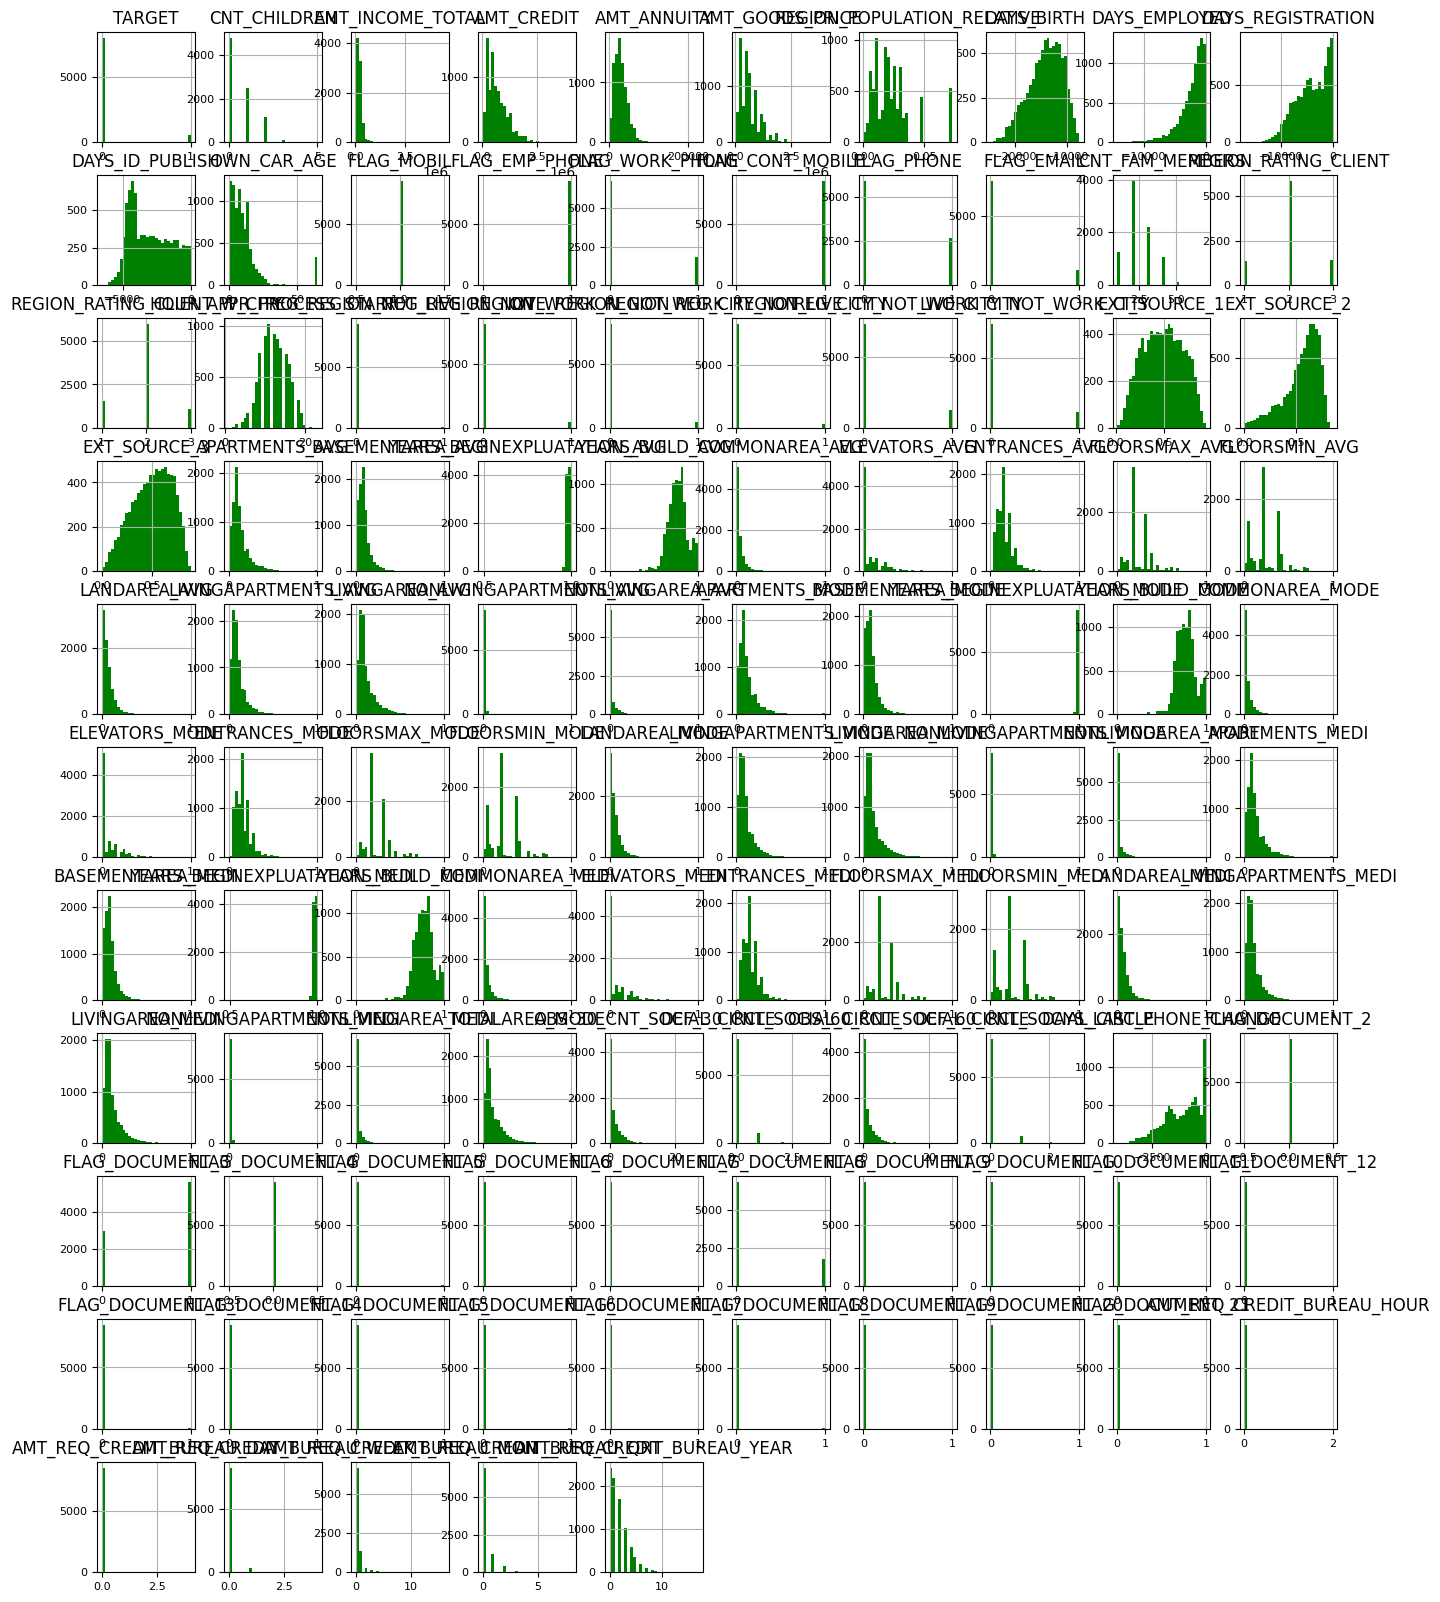

In [312]:
# Гістограми числових ознак навчальних даних після видалення пропущених значень
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns
train[numerical_features].hist(figsize = (16,20), color='g', bins=30, xlabelsize=8, ylabelsize=8)

In [313]:
# Вибір категоріальних ознак навчальних даних
categorical_features = train.select_dtypes(exclude=['int64', 'float64']).columns 
print(categorical_features)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


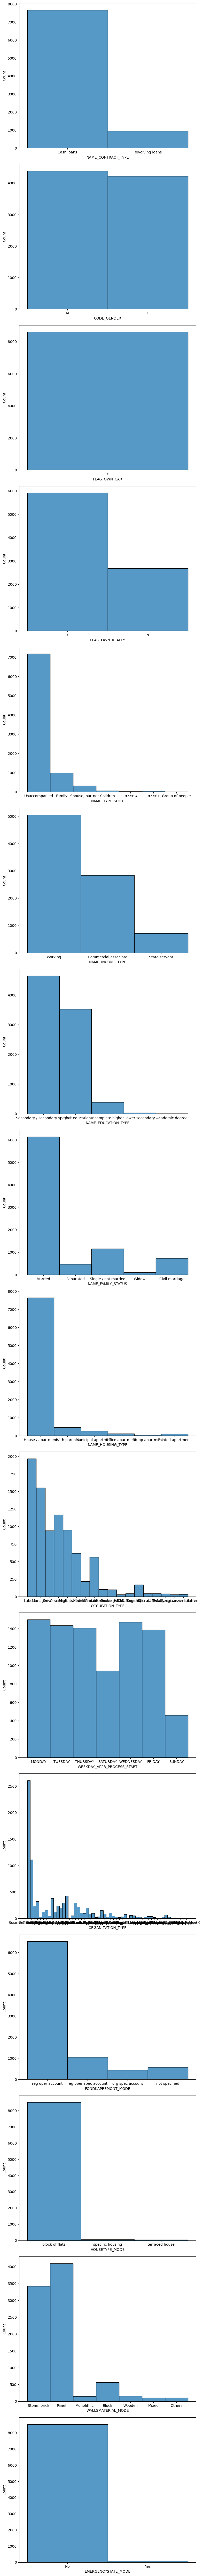

In [314]:
# Графіки розподілу категоріальних ознак навчальних даних
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, 30))
fig.set_size_inches(8,100)
for i, col in enumerate(categorical_features):
    sns.histplot(train[col], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

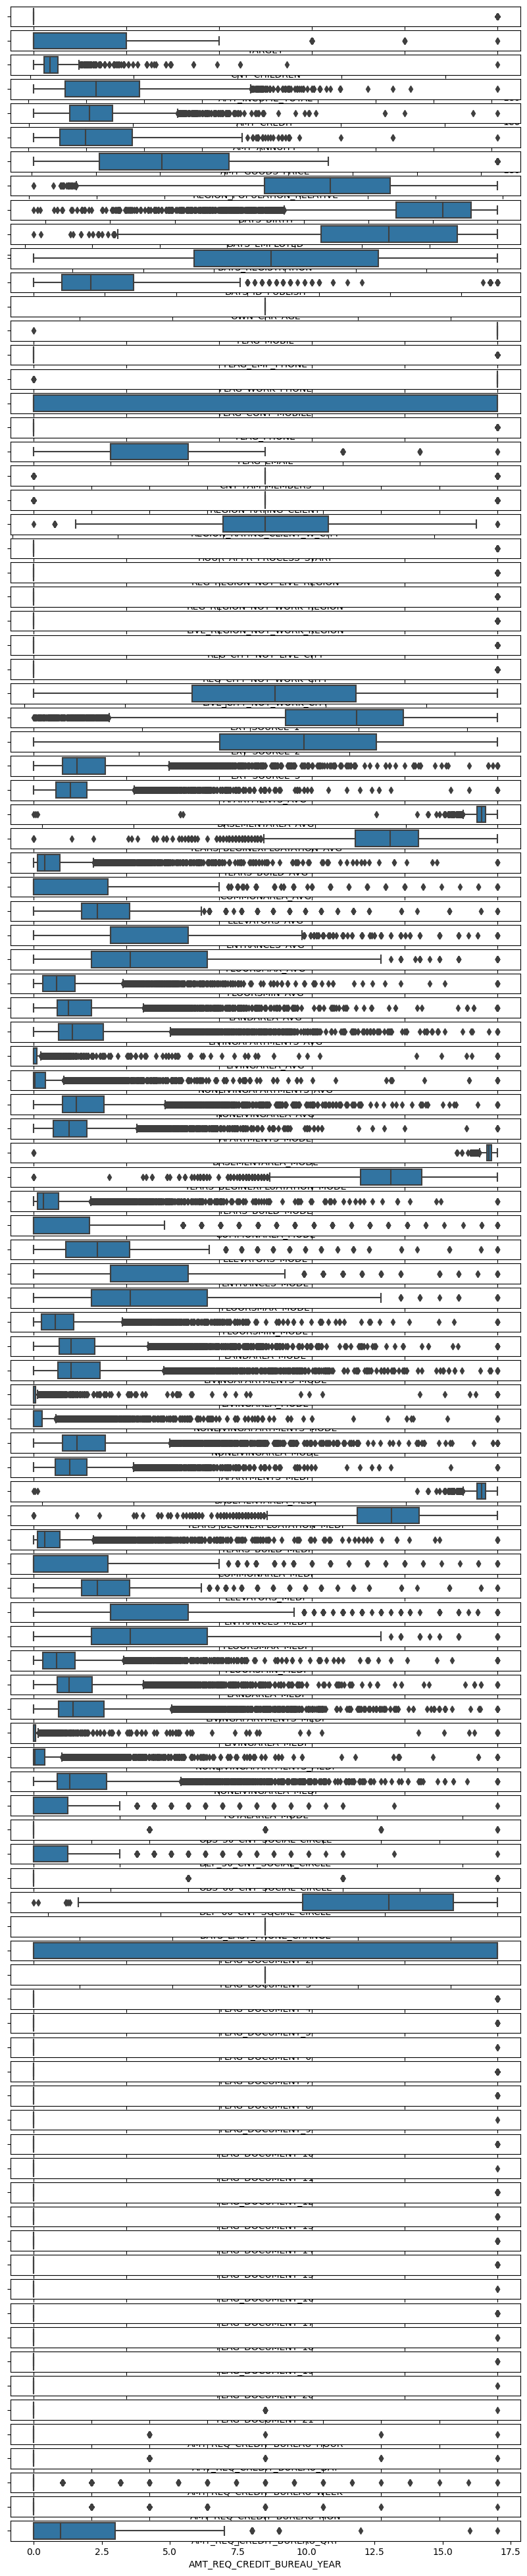

In [315]:
# Побудова ящикових діаграм числових ознак навчальних даних
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(10,50)
for i, col in enumerate(numerical_features):
    sns.boxplot(x=train[col], ax=axes[i])
plt.show()

<Axes: >

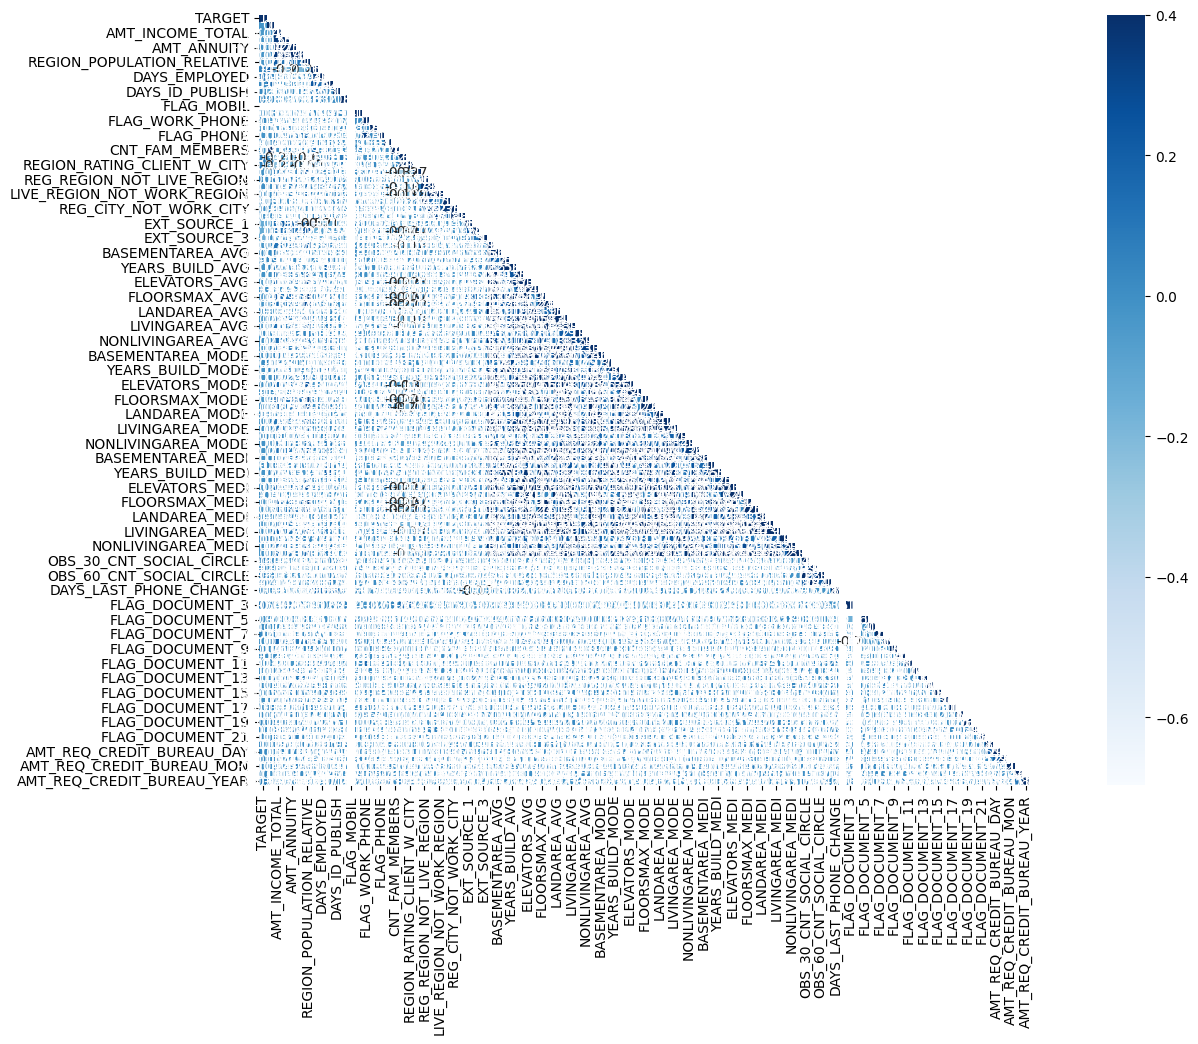

In [316]:
# Кореляційна матриця числових ознак навчальних даних
corrMatt = train[numerical_features].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, cmap="Blues", mask=mask, vmax=0.4, square=True, annot=True)

In [317]:
# Вибір ознак для навчання моделі
features_for_training = ['TARGET','CODE_GENDER','FLAG_OWN_CAR',
                           'FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL',
                           'AMT_CREDIT','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED',
                           'FLAG_MOBIL','REGION_RATING_CLIENT',
                           'LIVE_CITY_NOT_WORK_CITY','NAME_EDUCATION_TYPE']
# Вибір категоріальних та числових ознак для навчання моделі
categorical_training_columns = train[features_for_training].select_dtypes(exclude=['int64', 'float64']).columns
numerical_training_columns = train[features_for_training].select_dtypes(include=['int64', 'float64']).columns
print('Категоріальні ознаки для навчання:', categorical_training_columns)
print('Числові ознаки для навчання:', numerical_training_columns)

Категоріальні ознаки для навчання: Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_EDUCATION_TYPE'],
      dtype='object')
Числові ознаки для навчання: Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'REGION_RATING_CLIENT', 'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')


In [318]:
# Виведення унікальних значень категоріальних ознак
for col in categorical_training_columns:
    un = train[col].unique()
    print(col, ': ',un)

CODE_GENDER :  ['M' 'F']
FLAG_OWN_CAR :  ['Y']
FLAG_OWN_REALTY :  ['Y' 'N']
NAME_EDUCATION_TYPE :  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [319]:
# Заміна текстових значень числовими кодами для категоріальних ознак
numeric_representation = {
    "CODE_GENDER" : {'M':1, 'F':-1, 'XNA':0},
    "FLAG_OWN_CAR": {'N':0, 'Y':1},
    "FLAG_OWN_REALTY" : {'N':0, 'Y':1},
    "NAME_EDUCATION_TYPE" : {'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4}
}
train.replace(numeric_representation, inplace=True)
print(train[categorical_training_columns].head())

     CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  NAME_EDUCATION_TYPE
71             1             1                1                    1
124           -1             1                1                    1
152           -1             1                0                    3
161            1             1                0                    3
255            1             1                0                    1


In [320]:
# Вибір підмножини навчальних даних для моделі
selected_train_data = train[features_for_training]
selected_train_data

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,REGION_RATING_CLIENT,LIVE_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE
71,0,1,1,1,0,103500.0,573628.5,463500.0,-15406,-892,1,2,0,1
124,0,-1,1,1,1,202500.0,260725.5,198000.0,-16282,-4375,1,2,0,1
152,0,-1,1,0,0,202500.0,675000.0,675000.0,-11375,-2311,1,2,0,3
161,0,1,1,0,0,162000.0,263686.5,238500.0,-13972,-4472,1,2,0,3
255,1,1,1,0,1,225000.0,1019205.0,774000.0,-11356,-602,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,0,-1,1,1,2,112500.0,361462.5,274500.0,-15006,-1105,1,2,1,1
307359,0,-1,1,1,1,99000.0,675000.0,675000.0,-14007,-2021,1,3,0,1
307407,1,-1,1,1,1,261000.0,711454.5,643500.0,-11407,-1641,1,2,0,3
307456,0,-1,1,1,0,94500.0,270000.0,270000.0,-20246,-5452,1,2,0,1


In [321]:
# Підготовка навчальних даних для класифікації
train_data_for_classification = selected_train_data.drop("TARGET", axis=1)
features_for_training.remove("TARGET")

In [322]:
# Завантаження тестових даних та їх вибір підмножини ознак для моделі
test_data = pd.read_csv('./application_test.csv')
test_data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [323]:
test_data = test_data[features_for_training]
null_counts = getNullsCount(test_data)
test_data.replace(numeric_representation, inplace=True)
test_data

C:\Users\Pavel\AppData\Local\Temp\ipykernel_18996\3652120260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.replace(numeric_representation, inplace=True)


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,REGION_RATING_CLIENT,LIVE_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE
0,-1,0,1,0,135000.0,568800.0,450000.0,-19241,-2329,1,2,0,3
1,1,0,1,0,99000.0,222768.0,180000.0,-18064,-4469,1,2,0,1
2,1,1,1,0,202500.0,663264.0,630000.0,-20038,-4458,1,2,0,3
3,-1,0,1,2,315000.0,1575000.0,1575000.0,-13976,-1866,1,2,0,1
4,1,1,0,1,180000.0,625500.0,625500.0,-13040,-2191,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,-1,0,1,0,121500.0,412560.0,270000.0,-19970,-5169,1,3,0,1
48740,-1,0,0,2,157500.0,622413.0,495000.0,-11186,-1149,1,2,1,1
48741,-1,1,1,1,202500.0,315000.0,315000.0,-15922,-3037,1,2,0,1
48742,1,0,0,0,225000.0,450000.0,450000.0,-13968,-2731,1,2,1,3


In [324]:
from sklearn.metrics import roc_auc_score
# Розділення навчальних даних на тренувальну та валідаційну вибірки
X_train, X_val, y_train, y_val = train_test_split(train_data_for_classification, train['TARGET'], test_size=0.2)
# Навчання моделі логістичної регресії
lr_model = LogisticRegression(class_weight="balanced", max_iter=2000)
lr_model.fit(X_train, y_train)
# Прогнозування на валідаційній вибірці та обчислення точності
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)
print("Training Data:")
print("Accuracy: {:.4f}".format(accuracy_score(y_train, y_train_pred)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_train, y_train_pred)))
print("\nValidation Data:")
print("Accuracy: {:.4f}".format(accuracy_score(y_val, y_val_pred)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_val, y_val_pred)))

Training Data:
Accuracy: 0.5815
ROC AUC Score: 0.5626

Validation Data:
Accuracy: 0.5950
ROC AUC Score: 0.5853


In [325]:
y_test_pred = lr_model.predict(test_data)
origin_test_data = pd.read_csv('./application_test.csv')
result = pd.DataFrame({'SK_ID_CURR': origin_test_data['SK_ID_CURR'], 'TARGET': y_test_pred})
result.to_csv('./result.csv', index=False)